In [44]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.relativedelta import relativedelta

report_date_2 = date.today()- relativedelta(years=4)

In [2]:
# copy API key
key = 'wQ5FjyMjpTSO2j5vBxbLuIp72hwYd5E5' # key for stock value request
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl' # key for company fundamentals request

## Parameters

In [48]:
tickers = ['AAPL']
timespan = 'day'
multiplier = 1 #timespan multiplier e.g. 5 for five days
today = str(datetime.datetime.today()).split()[0]
pastXyears = str(date.today() - relativedelta(years=5))

In [49]:
pastXyears

'2018-03-16'

In [4]:
# tickers = (input('Input short stock name: '),)
start_date = '2022-01-01'
end_date = '2023-01-01'
timespan = 'year'

In [5]:
def get_aggregates(tickers):
    """Get aggregate bars for a stock
    over a given date range in custom time window sizes.
    """
    for ticker in tickers:
        print(f'Calling the API for {ticker}:')
        url = f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/{timespan}/{start_date}/{end_date}?adjusted=true&sort=asc&limit=120&apiKey={key}'
        response = requests.get(url).json()
        df = pd.DataFrame(response['results'])
        print(df)

In [6]:
get_aggregates(tickers)

Calling the API for AAPL:
              v        vw       o       c       h       l              t  \
0  1.144649e+10  159.7132  177.83  141.66  182.94  129.04  1641013200000   

          n  
0  95704612  


In [7]:
ticker = tickers[0]
url = f'https://api.polygon.io/vX/reference/financials?ticker={ticker}&timeframe=quarterly&include_sources=true&apiKey={api_key}'

fundamentals = requests.get(url).json()

In [8]:
fundam_df = pd.DataFrame.from_dict(fundamentals['results'][0]['financials']['income_statement']).T.sort_values(by = 'order')

In [9]:
fundam_df.iloc[0:2,:]

value unit                        label  \
revenues                 117154000000.0  USD                     Revenues   
benefits_costs_expenses   81531000000.0  USD  Benefits Costs and Expenses   

                        order               source  \
revenues                  100        direct_report   
benefits_costs_expenses   200  intra_report_impute   

                                                                     xpath  \
revenues                 //*[local-name()='RevenueFromContractWithCusto...   
benefits_costs_expenses                                                NaN   

                               formula  
revenues                           NaN  
benefits_costs_expenses  IS-Impute-202

In [10]:
fundamentals['results'][0]['start_date']

'2022-09-25'

In [11]:
mer = pd.DataFrame.from_dict(fundamentals['results'][0]['financials']['income_statement'])

In [12]:
mer.diluted_earnings_per_share

value                                                   1.88
unit                                            USD / shares
label                             Diluted Earnings Per Share
order                                                   4300
source                                         direct_report
xpath      //*[local-name()='EarningsPerShareDiluted' and...
formula                                                  NaN
Name: diluted_earnings_per_share, dtype: object

## EPS

In [13]:
def get_eps(ticker):
    """
    Gets the diluted_earnings_per_share value for 
    last quarter for the selected ticker
    """
    url = f'https://api.polygon.io/vX/reference/financials?ticker={ticker}&timeframe=quarterly&include_sources=true&apiKey={api_key}'

    fundamentals = requests.get(url).json()
    fundamentals_df = pd.DataFrame.from_dict(fundamentals['results'][0]['financials']['income_statement'])
    eps = fundamentals_df.diluted_earnings_per_share.value
    return eps

In [14]:
get_eps('TSLA')

1.0700000000000003

## test price history


In [50]:
tickers = ['AAPL']
timespan = 'day'
multiplier = 1 #timespan multiplier e.g. 5 for five days
today = str(datetime.datetime.today()).split()[0]
pastXyears = str(date.today() - relativedelta(years=5))
limit = 5000

In [59]:
urlX = f'https://api.polygon.io/v2/aggs/ticker/{tickers}/range/{multiplier}/{timespan}/{pastXyears}/{today}?adjusted=true&limit={limit}&apiKey=cSIE1gb5QulXNgxcXLte4VLS1f5tg9Oh'

In [60]:
phist = requests.get(urlX).json()

In [62]:
phist

{'ticker': "['AAPL']",
 'queryCount': 0,
 'resultsCount': 0,
 'adjusted': True,
 'status': 'DELAYED',
 'request_id': '6e5e51e9b68730ed1ed71de4d8116dad'}

In [61]:
close = [elem['c'] for elem in phist['results']]
close

KeyError: 'results'

In [24]:
urlY = 'https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/week/2021-01-09/2023-01-09?adjusted=true&sort=asc&limit=5000&apiKey=cSIE1gb5QulXNgxcXLte4VLS1f5tg9Oh'

In [25]:
phisty = requests.get(urlY).json()

In [29]:
close = [elem['c'] for elem in phisty['results']]
len(close)

96

In [32]:
range(0,len(close))

range(0, 96)

In [36]:
X = [_ for _ in range(0,len(close))]

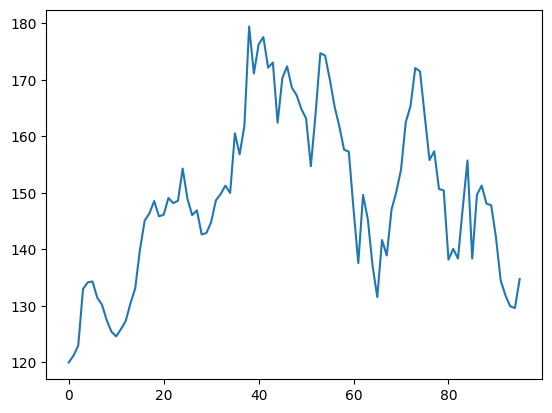

In [40]:
plt.plot(X, close)